# Project Description

**Does treatment of legumes with a peptide elicit an immune response that produces protease inhibitors?**

The goal of our project is to analyze raw data representing absorbance over time of varying chymotrypsin assays to determine if we see an increase in protease inhibitor activity in legumes treated with peptides.

Plant immune responses are crucial for defense against biotic and abiotic stressors. Phytopathogens like insects and bacteria affect plants in diverse ways. Protease inhibitors are produced by legumes to inhibit the protease activity of phytopathogens to reduce the nutrient availability from consuming the plants in hopes of deterring, slowing the growth rate, or killing the attacking species. For this reason, protease inhibitors are a promising, sustainable alternative to pesticides because they don't harm the environment and provide specific activity against phytopathogens (Rodríguez-Sifuentes et al. 2020). Plants are critical for feeding the ever-growing world population, and climate change is responsible for mass crop loss from drought and the emergence of new or more intense pests (Steinbrenner et al. 2020). By observing changes in protease and protease inhibitor activity in legumes after treatment with a peptide hypothesized to produce protease inhibitors in the plant immune response, we can determine if this mechanism can be used as a natural defense against pests.

Legume plants have three treatment groups that are extracted and used in the assays below:
1. unwounded: leaves that we take from the plants without any treatment
2. wounded + water: lesion created + treatement with water
3. wounded + peptide: lesion created + treatment with peptide

Three assay formats:
 1. no chymotrypsin: functions to identify and protease activity present in the plant extracts or lack thereof
 2. chymotrypsin: functions to observe protease inhibitor activity
 3. chymotrypsin + inhibitor: functions as a control to see what this assay looks like in the presence of protease inhibitor

Chymotrypsin activity is measured using BTEE, a substrate that becomes fluorescent when cleaved. Six evenly-spaced absorbance readings are taken over 4 minutes and 18 seconds by a plate reader to assess enzyme activity. Higher absorbance indicates active chymotrypsin, while lower absorbance suggests inhibition by plant-derived protease inhibitors.
This data is normalized by subtracting the first value in each well from every time point in the dataset to view the relative increase in absorbance over time. By comparing absorbance curves across treatments, we can determine if peptide treatment triggers protease inhibitor production as part of the plant’s immune response.


References:

Rodríguez-Sifuentes L, Marszalek JE, Chuck-Hernández C, Serna-Saldívar SO. Legumes Protease Inhibitors as Biopesticides and Their Defense Mechanisms against Biotic Factors. Int J Mol Sci. 2020 May 8;21(9):3322. doi: 10.3390/ijms21093322. PMID: 32397104; PMCID: PMC7246880.

Steinbrenner AD, Muñoz-Amatriaín M, Chaparro AF, Aguilar-Venegas JM, Lo S, Okuda S, Glauser G, Dongiovanni J, Shi D, Hall M, Crubaugh D, Holton N, Zipfel C, Abagyan R, Turlings TCJ, Close TJ, Huffaker A, Schmelz EA. A receptor-like protein mediates plant immune responses to herbivore-associated molecular patterns. Proc Natl Acad Sci U S A. 2020 Dec 8;117(49):31510-31518. doi: 10.1073/pnas.2018415117. Epub 2020 Nov 23. PMID: 33229576; PMCID: PMC7733821.

# Data Loading and Normalization


*   Import packages and load csv file to Pandas DataFrame



In [ ]:
#Upload file from laptop
from google.colab import files
uploaded = files.upload()

Saving 1_31_25_chymo_assay.csv to 1_31_25_chymo_assay.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data to Pandas DataFrame
df = pd.read_csv('1_31_25_chymo_assay.csv')
row_index = 'Sample'
df = df.set_index(row_index)
print(df)

                                   Time  T° 256  Well 1  Well 2  Well 3  \
Sample                                                                    
Blank_1                         0:00:03    21.0   0.458   0.487   0.488   
Blank_1                         0:00:54    21.0   0.456   0.483   0.487   
Blank_1                         0:01:45    21.0   0.455   0.482   0.489   
Blank_1                         0:02:36    21.0   0.455   0.480   0.491   
Blank_1                         0:03:27    21.1   0.455   0.479   0.489   
...                                 ...     ...     ...     ...     ...   
Chymo_with_Inhibitor_Peptide_3  0:00:54    23.2   1.105   1.071   1.100   
Chymo_with_Inhibitor_Peptide_3  0:01:45    23.2   1.110   1.076   1.088   
Chymo_with_Inhibitor_Peptide_3  0:02:36    23.2   1.108   1.076   1.102   
Chymo_with_Inhibitor_Peptide_3  0:03:27    23.2   1.122   1.083   1.106   
Chymo_with_Inhibitor_Peptide_3  0:04:18    23.2   1.112   1.086   1.106   

                        

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = '1_31_25_chymo_assay.csv'

# Load and validate file is a CSV file
try:
    df = pd.read_csv(file_path)
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Check for 'Sample' column and set as index
if 'Sample' not in df.columns:
    raise ValueError("'Sample' column not found. Please check the CSV file.")
df = df.set_index('Sample')

# Validate that there are 6 time replicates
invalid_replicates = df.index.value_counts()[lambda x: x != 6] #invalid_replicates checks for when there are not 6 replicates in each sample
if not invalid_replicates.empty: # checks that none of the samples are in invalid_replicates (it is empty), to make sure there are 6 replicates
    print("Samples without 6 replicates", invalid_replicates)
    raise ValueError("Data validation failed: Check replicate counts.")
else:
    print("All samples have 6 replicates.")

print(df)

All samples have 6 replicates.
                                   Time  T° 256  Well 1  Well 2  Well 3  \
Sample                                                                    
Blank_1                         0:00:03    21.0   0.458   0.487   0.488   
Blank_1                         0:00:54    21.0   0.456   0.483   0.487   
Blank_1                         0:01:45    21.0   0.455   0.482   0.489   
Blank_1                         0:02:36    21.0   0.455   0.480   0.491   
Blank_1                         0:03:27    21.1   0.455   0.479   0.489   
...                                 ...     ...     ...     ...     ...   
Chymo_with_Inhibitor_Peptide_3  0:00:54    23.2   1.105   1.071   1.100   
Chymo_with_Inhibitor_Peptide_3  0:01:45    23.2   1.110   1.076   1.088   
Chymo_with_Inhibitor_Peptide_3  0:02:36    23.2   1.108   1.076   1.102   
Chymo_with_Inhibitor_Peptide_3  0:03:27    23.2   1.122   1.083   1.106   
Chymo_with_Inhibitor_Peptide_3  0:04:18    23.2   1.112   1.086   1.1

* Normalize data by setting first point in dataset to 0 and subtracting first point from each subsequent time point and save as a copy of the original DataFrame

* This also includes omitting any Absorbance values that are negative or >2.



In [ ]:
# Create a copy of original DataFrame so we can alter this copy
norm_df = df.copy()

# Create list of columns
well_columns = ['Well 1', 'Well 2', 'Well 3', 'Well 4']

# Remove errors and normalize data by subtracting first time point from each following data point in well for that trial
for well in well_columns:
  # Remove absorbance values of each well that are negative or > 2
  norm_df.loc[(norm_df[well] >= 2) | (norm_df[well] < 0), well] = np.nan
  # Subtract first time point for each well in each sample group to normalize
  norm_df[well] = df.groupby('Sample')[well].transform(lambda x: x - x.iloc[0])


def convert_to_seconds(time_str):
    '''
      Takes time in format of hour:min:sec and converts it to seconds
      Parameters: takes time_str which is hour:min:sec
      Returns: time in seconds
    '''
    hours, minutes, seconds = map(int, time_str.split(':'))
    return hours * 3600 + minutes * 60 + seconds
norm_df['Time (seconds)'] = norm_df['Time'].apply(convert_to_seconds)

norm_df.head()

,Time,T° 256,Well 1,Well 2,Well 3,Well 4,Protein Concentration,uL Protein,Time (seconds)
Sample,,,,,,,,,
Blank_1,0:00:03,21.0,0.000,0.000,0.000,0.000,0.0,0,3
Blank_1,0:00:54,21.0,-0.002,-0.004,-0.001,-0.002,0.0,0,54
Blank_1,0:01:45,21.0,-0.003,-0.005,0.001,-0.003,0.0,0,105
Blank_1,0:02:36,21.0,-0.003,-0.007,0.003,-0.003,0.0,0,156
Blank_1,0:03:27,21.1,-0.003,-0.008,0.001,-0.003,0.0,0,207


* Calculate average absorbance across all 4 wells for each sample and save to Pandas DataFrame

In [ ]:
def avg_abs():
    """
    Calculates the average absorbance for each well (1 through 4).

    Parameters:
        df (pd.DataFrame): The input DataFrame containing absorbance values for multiple wells.

    Returns:
        pd.DataFrame: Updated DataFrame with an 'Average Absorbance' column.
    """
    well_columns = ["Well 1", "Well 2", "Well 3", "Well 4"]

    for well in well_columns:
        if well not in norm_df.columns:
            raise ValueError(f"Column '{well}' not found in DataFrame.")

    norm_df["Average Absorbance"] = norm_df[well_columns].mean(axis=1)

    return norm_df

avg_abs()

,Time,T° 256,Well 1,Well 2,Well 3,Well 4,Protein Concentration,uL Protein,Time (seconds),Average Absorbance
Sample,,,,,,,,,,
Blank_1,0:00:03,21.0,0.000,0.000,0.000,0.000,0.000,0,3,0.00000
Blank_1,0:00:54,21.0,-0.002,-0.004,-0.001,-0.002,0.000,0,54,-0.00225
Blank_1,0:01:45,21.0,-0.003,-0.005,0.001,-0.003,0.000,0,105,-0.00250
Blank_1,0:02:36,21.0,-0.003,-0.007,0.003,-0.003,0.000,0,156,-0.00250
Blank_1,0:03:27,21.1,-0.003,-0.008,0.001,-0.003,0.000,0,207,-0.00325
...,...,...,...,...,...,...,...,...,...,...
Chymo_with_Inhibitor_Peptide_3,0:00:54,23.2,0.018,0.000,0.011,-0.004,3.888,20,54,0.00625
Chymo_with_Inhibitor_Peptide_3,0:01:45,23.2,0.023,0.005,-0.001,-0.001,3.888,20,105,0.00650
Chymo_with_Inhibitor_Peptide_3,0:02:36,23.2,0.021,0.005,0.013,-0.004,3.888,20,156,0.00875


In [ ]:
#adding new column (average absorbance / protein concentration) to dataframe
norm_df['Avg Absorbance Rel. to Protein Conc'] = norm_df['Average Absorbance'] / norm_df['Protein Concentration']
norm_df

,Time,T° 256,Well 1,Well 2,Well 3,Well 4,Protein Concentration,uL Protein,Time (seconds),Average Absorbance,Avg Absorbance Rel. to Protein Conc
Sample,,,,,,,,,,,
Blank_1,0:00:03,21.0,0.000,0.000,0.000,0.000,0.000,0,3,0.00000,NaN
Blank_1,0:00:54,21.0,-0.002,-0.004,-0.001,-0.002,0.000,0,54,-0.00225,-inf
Blank_1,0:01:45,21.0,-0.003,-0.005,0.001,-0.003,0.000,0,105,-0.00250,-inf
Blank_1,0:02:36,21.0,-0.003,-0.007,0.003,-0.003,0.000,0,156,-0.00250,-inf
Blank_1,0:03:27,21.1,-0.003,-0.008,0.001,-0.003,0.000,0,207,-0.00325,-inf
...,...,...,...,...,...,...,...,...,...,...,...
Chymo_with_Inhibitor_Peptide_3,0:00:54,23.2,0.018,0.000,0.011,-0.004,3.888,20,54,0.00625,0.001608
Chymo_with_Inhibitor_Peptide_3,0:01:45,23.2,0.023,0.005,-0.001,-0.001,3.888,20,105,0.00650,0.001672
Chymo_with_Inhibitor_Peptide_3,0:02:36,23.2,0.021,0.005,0.013,-0.004,3.888,20,156,0.00875,0.002251


* Save each assay format into it's own DataFrame to make graph generation easier

In [ ]:
def split_chymo_assays(norm_df):
    """
    Splits normalized DataFrame into:
    1. No Chymotrypsin samples
    2. Chymotrypsin assay samples (excluding inhibitors and no chymo)
    3. Chymotrypsin + Inhibitor samples

    Returns filtered DataFrames (no_chymo_df, chymo_df, inhibitor_chymo_df)
    """
    # No Chymotrypsin
    no_chymo_df = norm_df[norm_df.index.str.startswith('No_Chymo', na=False)]

    # Chymotrypsin Assay (excluding inhibitors and no chymo)
    chymo_df = norm_df[norm_df.index.str.startswith('Chymo', na=False) &
                       ~norm_df.index.str.contains('inhibitor|no_chymo', case=False, na=False)]

    # Chymotrypsin + Inhibitor
    inhibitor_chymo_df = norm_df[norm_df.index.str.startswith('Chymo_with_Inhibitor', na=False)]

    return no_chymo_df, chymo_df, inhibitor_chymo_df

no_chymo_df, chymo_df, inhibitor_chymo_df = split_chymo_assays(norm_df) #Assigning the returned DataFrames from the function call to individual dataframes

print(no_chymo_df.head())
print(chymo_df.head())
print(inhibitor_chymo_df.head())


                         Time  T° 256  Well 1  Well 2  Well 3  Well 4  \
Sample                                                                  
No_Chymo_Unwounded_1  0:00:03    21.0   0.000   0.000   0.000   0.000   
No_Chymo_Unwounded_1  0:00:54    21.0   0.005   0.005   0.003   0.005   
No_Chymo_Unwounded_1  0:01:45    21.0   0.008   0.005   0.004   0.005   
No_Chymo_Unwounded_1  0:02:36    21.0   0.009   0.005   0.004   0.006   
No_Chymo_Unwounded_1  0:03:27    21.1   0.010   0.005   0.005   0.006   

                      Protein Concentration  uL Protein  Time (seconds)  \
Sample                                                                    
No_Chymo_Unwounded_1                  4.804          20               3   
No_Chymo_Unwounded_1                  4.804          20              54   
No_Chymo_Unwounded_1                  4.804          20             105   
No_Chymo_Unwounded_1                  4.804          20             156   
No_Chymo_Unwounded_1                  

# Graphs - Absorbance vs Time

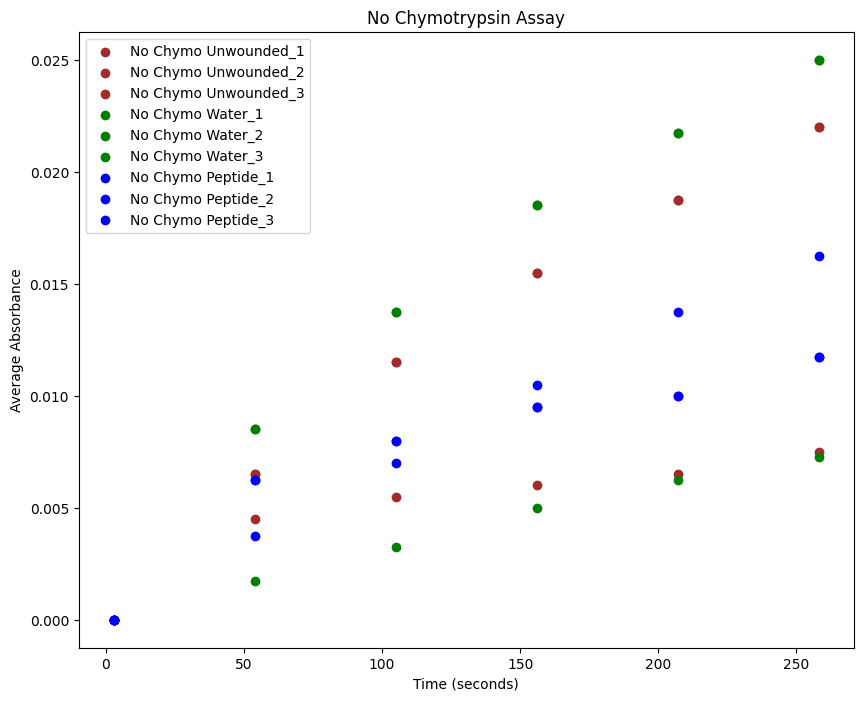

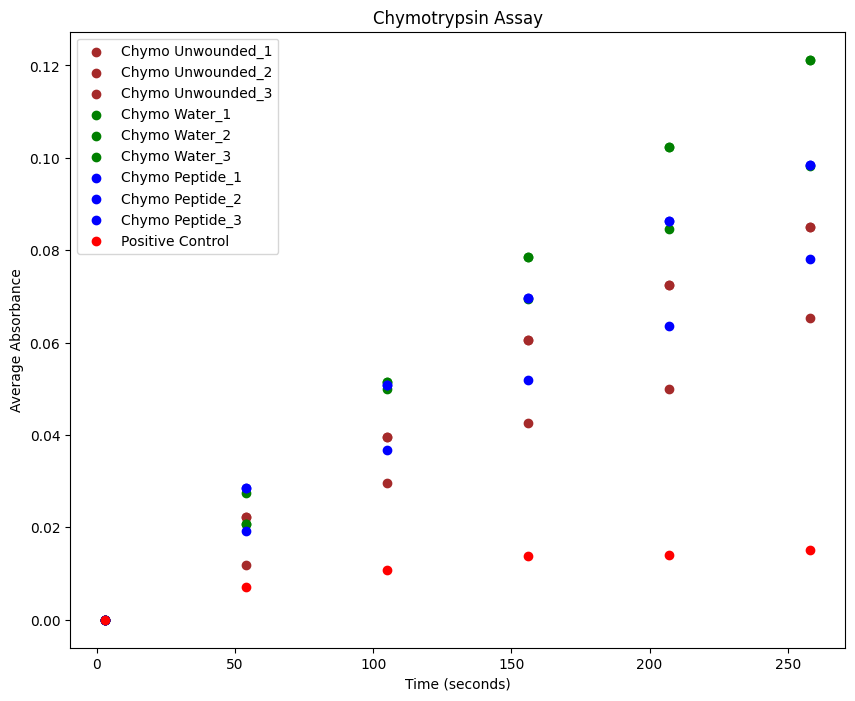

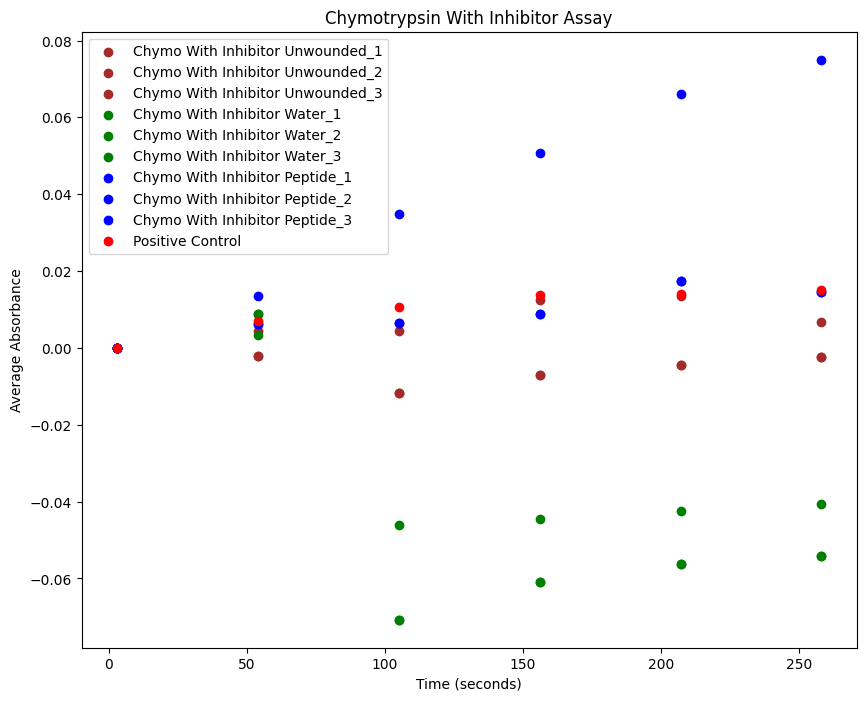

In [ ]:
def plot_chymo_assays(no_chymo_df, chymo_df, inhibitor_chymo_df, norm_df):
    '''
    Plots a scatter plot of absorbance vs time (s) for each assay- Chymotrypsin, No Chymotrypsin and Chymotrypsin with Inhibitor.
    Parameters:
        no_chymo_df is the dataframe for the No Chymotrypsin assay.
        chymo_df is the dataframe for the Chymotrypsin assay.
        inhibitor_chymo_df is the dataframe for the Chymotrypsin with Inhibitor assay.
        norm_df is the normalized dataframe.
    '''
    conditions = {
        "Unwounded": ("Unwounded_", "brown"),
        "Water": ("Water_", "green"),
        "Peptide": ("Peptide_", "blue"),
    } #defines treatment conditions within each assay and what color to plot them in

    # Filters Positive Control rows from norm_df
    positive_control_df = norm_df[norm_df.index == "Positive_Control"]

    # First plot: No Chymotrypsin Assay
    plt.figure(figsize=(10, 8))
    for label, (suffix, color) in conditions.items():
        for i in range(1, 4):  # Iterate over the 3 replicates of each treatment condition
            replicate_df = no_chymo_df.loc[no_chymo_df.index.isin([f"No_Chymo_{suffix}{i}"])] #pulls data with index that starts with No_Chymo from no_chymo_df
            plt.scatter(replicate_df['Time (seconds)'], replicate_df['Average Absorbance'], label=f"No Chymo {label}_{i}", color=color)
    #Checks if data exists
    if replicate_df.empty:
      print("Warning: No data found")
    else:
      plt.xlabel('Time (seconds)')
      plt.ylabel('Average Absorbance')
      plt.title('No Chymotrypsin Assay')
      plt.legend()
      plt.show()

    # Second plot: Chymotrypsin Assay
    plt.figure(figsize=(10, 8))
    for label, (suffix, color) in conditions.items():
        for i in range(1, 4):
            replicate_df = chymo_df.loc[chymo_df.index.isin([f"Chymo_{suffix}{i}"])]
            plt.scatter(replicate_df['Time (seconds)'], replicate_df['Average Absorbance'], label=f"Chymo {label}_{i}", color=color)

    # Add Positive Control Line
    if not positive_control_df.empty:
      plt.scatter(positive_control_df["Time (seconds)"], positive_control_df["Average Absorbance"], label="Positive Control",color="red")
    #Checks if data exists
    if replicate_df.empty:
      print("Warning: No data found")
    else:
      plt.xlabel('Time (seconds)')
      plt.ylabel('Average Absorbance')
      plt.title('Chymotrypsin Assay')
      plt.legend()
      plt.show()

    # Third Plot: Chymo With Inhibitor Assay
    plt.figure(figsize=(10, 8))
    for label, (suffix, color) in conditions.items():
        for i in range(1, 4):
            replicate_df = inhibitor_chymo_df.loc[inhibitor_chymo_df.index.isin([f"Chymo_with_Inhibitor_{suffix}{i}"])]
            plt.scatter(replicate_df['Time (seconds)'],replicate_df['Average Absorbance'],label=f"Chymo With Inhibitor {label}_{i}",color=color)

    # Add Positive Control Line
    if not positive_control_df.empty:
      plt.scatter(positive_control_df["Time (seconds)"], positive_control_df["Average Absorbance"], label="Positive Control", color="red")
    #Checks if data exists
    if replicate_df.empty:
      print("Warning: No data found")
    else:
      plt.xlabel('Time (seconds)')
      plt.ylabel('Average Absorbance')
      plt.title('Chymotrypsin With Inhibitor Assay')
      plt.legend()
      plt.show()

plot_chymo_assays(no_chymo_df, chymo_df, inhibitor_chymo_df, norm_df)

# Graphs: Absorbance vs Time - Relative to Protein Concentration

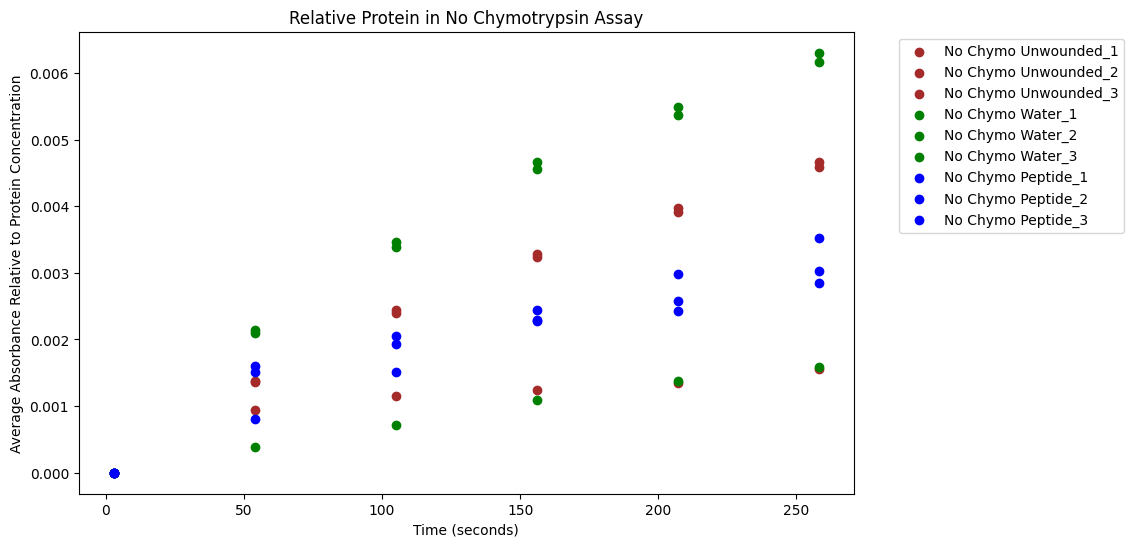

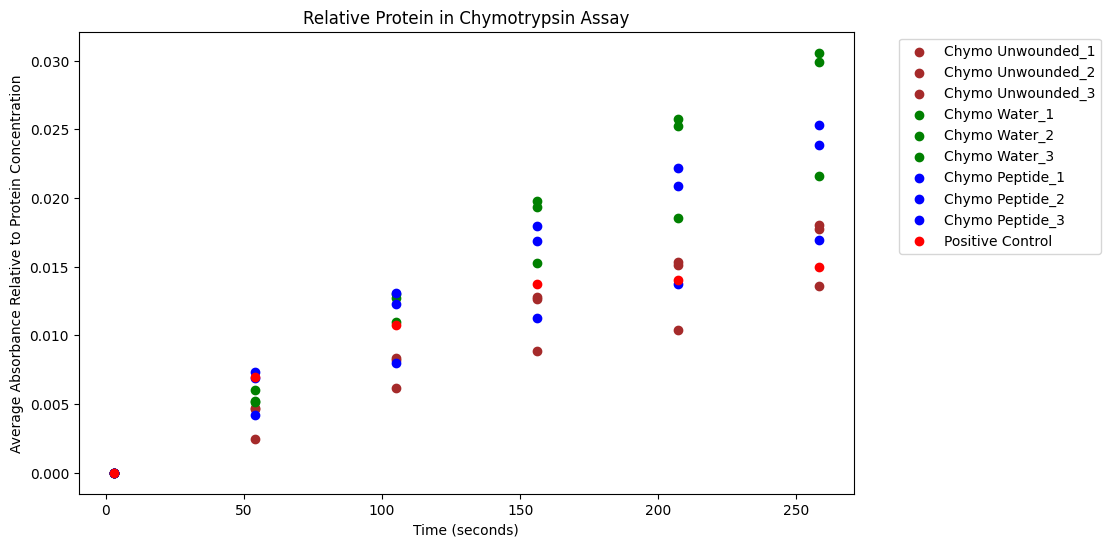

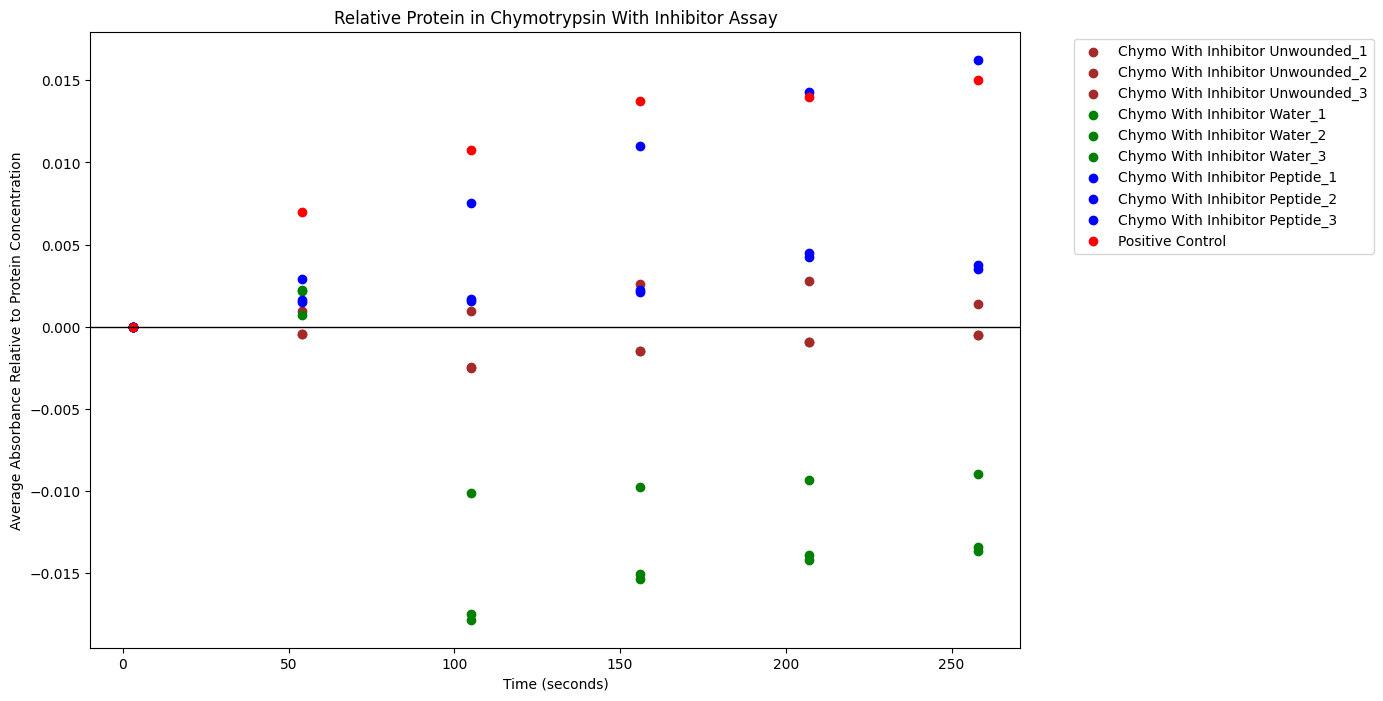

In [ ]:
def abs_time_graph_relative_protein(no_chymo_df, chymo_df, inhibitor_chymo_df, norm_df):

  """
  Plots a scatter plot for each assay (no chymotrypsin, chymotrypsin, chymotrypsin with inhibitor) for
  unwounded, water, and peptide treatment relative to average absorbance and protein concentration at each timepoint.

    Parameters:
        no_chymo_df is the dataframe for the No Chymotrypsin assay.
        chymo_df is the dataframe for the Chymotrypsin assay.
        inhibitor_chymo_df is the dataframe for the Chymotrypsin with Inhibitor assay.
        norm_df is the normalized dataframe.
    Returns:
        graphs of assays relative to protein concentration
    """
  conditions = {'Unwounded': ('Unwounded_','brown'),
                'Water': ('Water_','green'),
                'Peptide': ('Peptide_','blue')}
  #conditions is the legend used in each of the graphs

  #removing Positive Control from norm_df
  positive_control_df = norm_df[norm_df.index == "Positive_Control"]


  #Plot the No Chymotrypsin assay graph
  plt.figure(figsize=(10, 6))
  for label, (suffix, color) in conditions.items():
        for i in range(1, 4):     #taking only from samples that are unwounded, treated with water, or treated with peptide
            assay_condition = [f"No_Chymo_{suffix}{i}"]       #name of datapoint in dataframe index being graphed assigned to a variable
            abs_protein_no_chymo_df = no_chymo_df.loc[no_chymo_df.index.isin(assay_condition)]
            plt.scatter(abs_protein_no_chymo_df['Time (seconds)'], abs_protein_no_chymo_df['Avg Absorbance Rel. to Protein Conc'],
                        label=f"No Chymo {label}_{i}", color=color)

  #Checks if dataframe has data in it. If yes, then plot graph
  if abs_protein_no_chymo_df.empty:
      print("Warning: No data found in no chymotrypsin dataframe")
  else:
      plt.xlabel('Time (seconds)')
      plt.ylabel('Average Absorbance Relative to Protein Concentration')
      plt.title('Relative Protein in No Chymotrypsin Assay')
      plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
      plt.show()


  #Plot the Chymotrypsin graph
  plt.figure(figsize=(10, 6))
  for label, (suffix, color) in conditions.items():
        for i in range(1, 4):
            assay_condition = [f"Chymo_{suffix}{i}"]
            abs_protein_chymo_df = chymo_df.loc[chymo_df.index.isin(assay_condition)]
            plt.scatter(abs_protein_chymo_df['Time (seconds)'], abs_protein_chymo_df['Avg Absorbance Rel. to Protein Conc'],
                        label=f"Chymo {label}_{i}", color=color)

  #Add Positive Control Line
  if not positive_control_df.empty:
      plt.scatter(positive_control_df["Time (seconds)"], positive_control_df["Average Absorbance"], label="Positive Control",color="red")

  #Check if dataframe has data in it. If yes, then plot graph
  if abs_protein_chymo_df.empty:
      print("Warning: No data found in chymotrypsin assay")
  else:
      plt.xlabel('Time (seconds)')
      plt.ylabel('Average Absorbance Relative to Protein Concentration')
      plt.title('Relative Protein in Chymotrypsin Assay')
      plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
      plt.show()


  #Plot Chymotrypsin with inhibitor graph
  plt.figure(figsize=(12, 8))
  for label, (suffix, color) in conditions.items():
        for i in range(1, 4):
            assay_condition = [f"Chymo_with_Inhibitor_{suffix}{i}"]
            abs_protein_chymo_inhibitor = inhibitor_chymo_df.loc[inhibitor_chymo_df.index.isin(assay_condition)]
            plt.scatter(abs_protein_chymo_inhibitor['Time (seconds)'],abs_protein_chymo_inhibitor['Avg Absorbance Rel. to Protein Conc'],
                        label=f"Chymo With Inhibitor {label}_{i}",color=color)
  #Add Positive Control Line
  if not positive_control_df.empty:
      plt.scatter(positive_control_df["Time (seconds)"], positive_control_df["Average Absorbance"], label="Positive Control", color="red")

  #Check if dataframe has data in it. If yes, then plot graph
  if abs_protein_chymo_inhibitor.empty:
      print("Warning: No data found in chymotrypsin with inhibitor assay")
  else:
      plt.xlabel('Time (seconds)')
      plt.ylabel('Average Absorbance Relative to Protein Concentration')
      plt.title('Relative Protein in Chymotrypsin With Inhibitor Assay')
      plt.axhline(0, color='black', linewidth=1)
      plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
      plt.show()

abs_time_graph_relative_protein(no_chymo_df, chymo_df, inhibitor_chymo_df, norm_df)


folder_path = # Specify the folder path where you want to save the image
os.makedirs(folder_path, exist_ok=True)  # Create the folder if it doesn't exist

#Save the plot
file_path = os.path.join(folder_path, 'plot1.png')
plt.savefig(file_path)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Statistical Analysis

Check if data is normal

-If normal: run ANOVA test
-If not normal: Kruskal-Wallis

In [ ]:
from scipy.stats import kruskal, mannwhitneyu, shapiro, f_oneway, ttest_ind

def statistical_analysis(df, assay_name):
    """
    Perform Shapiro-Wilk normality tests, then:
    - If data is normal: perform ANOVA and/or t-tests.
    - If data is non-normal: perform Kruskal-Wallis and/or Mann-Whitney U tests.
    """
    print(f"\n--- Statistical Analysis for {assay_name} ---")

    # Extracts groups based on index names. It is case insensitive and filters out rows with no data and drops missing absorbance values
    peptide = df[df.index.str.contains('peptide', case=False, na=False)]['Average Absorbance'].dropna()
    water = df[df.index.str.contains('water', case=False, na=False)]['Average Absorbance'].dropna()
    unwounded = df[df.index.str.contains('unwounded', case=False, na=False)]['Average Absorbance'].dropna()

    # Checks if each group has data after earlier filtering and removes completely empty groups before moving to stats testing
    available_groups = {'peptide': peptide, 'water': water, 'unwounded': unwounded}
    filtered_groups = {}
    for key, value in available_groups.items():
      if len(value) > 0:
        filtered_groups[key] = value
    #to replace available_groups with filtered dictionary
    available_groups = filtered_groups
    #checking to make sure there is 2 groups to compare
    if len(available_groups) < 2:
        print("Not enough groups for statistical testing.")
        return

    # Shapiro-Wilk Normality Test- if p<0.05 we fail to reject null hypothesis- data in assay is normal
    print("\nShapiro-Wilk Normality Test:")
    normality_results = {}
    all_normal = True
    for name, data in available_groups.items():
        _, p = shapiro(data)
        normality_results[name] = p
        print(f"{name}: p-value={p:.4f}")
        if p < 0.05:  # Reject null hypothesis of normality
            all_normal = False
            print(f"Data in {name} is not normally distributed.")
        else:
            print(f"Data in {name} is normally distributed.")


    # If all groups in the assay are normal, run ANOVA and/or pairwise t-tests
    if all_normal:
        print("\nAll groups are normally distributed. Performing ANOVA and/or t-tests.")
        # ANOVA
        anova_result = f_oneway(*available_groups.values())
        f_stat, p_anova = anova_result.statistic, anova_result.pvalue
        print(f"\nANOVA:\nF-Statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}")

        # Pairwise t-tests performed only if there is a statistical significance from ANOVA to identify between which conditions it is
        if p_anova < 0.05:
          if f_stat > 1.5: #arbitrary value set and can be changed based on context of data
            print("\nThere is a statistically significant difference in the decrease of absorbance over time amongst the treatment conditions. Running pairwise t-tests:")
            #Pair-wise T-test
            print("\nPairwise T-test:")
            groups = list(available_groups.keys())
            for i in range(len(groups)):
                for j in range(i + 1, len(groups)):
                      group1_name, group2_name = groups[i], groups[j]
                      group1_data, group2_data = available_groups[group1_name], available_groups[group2_name]
                      t_result = ttest_ind(group1_data, group2_data, equal_var=False)
                      print(f"\n{group1_name} vs {group2_name}: t={t_result.statistic:.4f}, p-value={t_result.pvalue:.4f}")
                      if t_result.pvalue < 0.05:
                        print(f"There is a statistically significant difference between {group1_name} and {group2_name}.")
                      else:
                        print(f"There is no statistically significant difference between {group1_name} and {group2_name}.")
        else:
          print("\nNo statistically significant difference in the decrease of absorbance over time amongst the treatment conditions. Skipping pairwise t-tests.")

    # If any group in the assay is not normal, run Kruskal-Wallis and Mann-Whitney U tests
    else:
        print("\nAt least one group is not normally distributed. Performing Kruskal-Wallis and/or Mann-Whitney U tests.")

        # Kruskal-Wallis Test
        kruskal_result = kruskal(*available_groups.values())
        print(f"\nKruskal-Wallis Test:\nStatistic: {kruskal_result.statistic:.4f}, p-value: {kruskal_result.pvalue:.6f}")
        if kruskal_result.pvalue < 0.05:
            print("\nThere is a statistically significant difference in the decrease of absorbance over time amongst the treatment conditions. Running Mann-Whitney U Test")
            # Pairwise Mann-Whitney U Tests
            print("\nPairwise Mann-Whitney U Tests:")
            groups = list(available_groups.keys())
            for i in range(len(groups)):
                for j in range(i + 1, len(groups)):
                    group1_name, group2_name = groups[i], groups[j]
                    group1_data, group2_data = available_groups[group1_name], available_groups[group2_name]
                    mwu_result = mannwhitneyu(group1_data, group2_data, alternative='two-sided')
                    print(f"\n{group1_name} vs {group2_name}: U={mwu_result.statistic:.4f}, p-value={mwu_result.pvalue:.4f}")
                    if mwu_result.pvalue < 0.05:
                        print(f"There is a statistically significant difference between {group1_name} and {group2_name}.")
                    else:
                        print(f"There is no statistically significant difference between {group1_name} and {group2_name}.")
        else:
            print("\nThere is no statistically significant difference in the decrease of absorbance over time amongst the treatment conditions.")


# Applying this to our Assays:
statistical_analysis(no_chymo_df, "No Chymotrypsin")
statistical_analysis(chymo_df, "Chymotrypsin")
statistical_analysis(inhibitor_chymo_df, "Chymotrypsin with Inhibitor")



--- Statistical Analysis for No Chymotrypsin ---

Shapiro-Wilk Normality Test:
peptide: p-value=0.2692
Data in peptide is normally distributed.
water: p-value=0.0791
Data in water is normally distributed.
unwounded: p-value=0.1178
Data in unwounded is normally distributed.

All groups are normally distributed. Performing ANOVA and/or t-tests.

ANOVA:
F-Statistic: 0.8775, p-value: 0.4220

No statistically significant difference in the decrease of absorbance over time amongst the treatment conditions. Skipping pairwise t-tests.

--- Statistical Analysis for Chymotrypsin ---

Shapiro-Wilk Normality Test:
peptide: p-value=0.2433
Data in peptide is normally distributed.
water: p-value=0.1902
Data in water is normally distributed.
unwounded: p-value=0.2600
Data in unwounded is normally distributed.

All groups are normally distributed. Performing ANOVA and/or t-tests.

ANOVA:
F-Statistic: 1.1736, p-value: 0.3175

No statistically significant difference in the decrease of absorbance over tim